## Regression

* Using a model to predict numerical data
  * Salaries, statistics, age, sizes, etc.

## 2 Examples of Linear regression

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Linear_Function_Graph.svg/300px-Linear_Function_Graph.svg.png)

## Example: Plotting number of suicides and US science spending

#### A word of caution before we go into below data analysis:
***correlation is not causation***  
This is an important point! If x and y are
strongly correlated, that might mean that x causes y, that y causes x, that each causes
the other, that some third factor causes both, or ***it might mean nothing***

But too illustrate this point, we will look at to data features that has a correlation with each other but doubtfully has a direct mutual causation.

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("data/science.csv")
data

,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


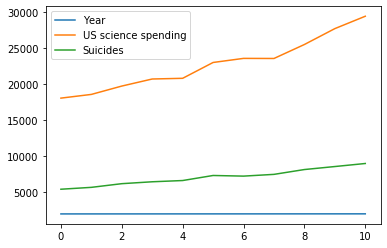

In [2]:
data.plot()

### Correlation
The above plot shows how over time there is a correlation between US science spending and number of suicides in the population.  
Offcourse it would be more interesting to look at the change in unimployment, homelessnes, drug use etc. to see a more direct causation.

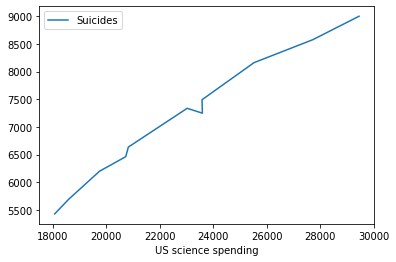

In [3]:
# Errrm, ups, what I really wanted was the science spending on the x axis and the suicides on the Y
data.plot(x = 1, y = 2)

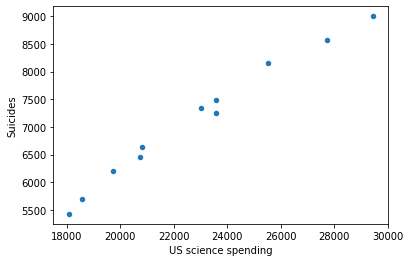

In [4]:
# Ok, but why the line? Let's do a scatter plot
data.plot.scatter(x = 1, y = 2)

## Uh, looks close to a line, right?! Let's try to draw a straight line between the points


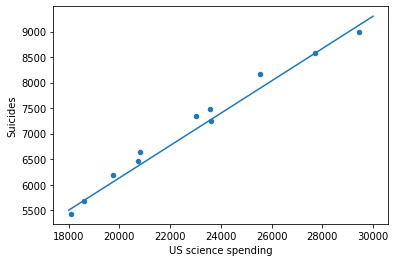

In [5]:
import matplotlib.pyplot as plt
data.plot.scatter(x = 1, y = 2)
plt.plot([18000, 30000], [5500, 9300])

## We can now do predictions about the future!

We can simply look at the graph to find out how many suicides we will have if we change the US science spending.

* Unfortunately it's pretty hard to read it out graphically, so let's get the formula (the grade and the intercept, alpha and beta)

$y = \alpha x + \beta$  
$\alpha = \frac{\delta y}{\delta x}$    
$\beta = y - \alpha x$  

$P1 = (18000,5500)$  
$P2 = (30000,9300)$  

$\delta x = (30000-18000)$  
$\delta y = (9300-5500)$  

grade = (9300-5500)/(30000-18000) = 0.32  
intercept = (5500 - 0.32*18000) = -260

Resulting formula:  
$y = 0.32x - 260$

So now given any x we can predict y


Above We found the slope of the triangle ($\alpha$). And then we can use the slope to extrapolate the point $(18000, 5500)$ 


## Introducing sklearn

* **Scikit-learn** is a pretty cool machine learning framework with a lot of tools
  * https://scikit-learn.org/

## Introduction to linear regression with sklearn
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [6]:
import sklearn

## Improving our model

* Before, I was just taking a random guess on what was a good model, luckily `sklearn` is much better at guessing than we are.
  * We can use `sklearn` to construct a `LinearRegression` model
  
* **Regression** means approaching a better model
  * So we are actively trying to find the perfect linear model ($\alpha x + \beta$) that fits our data
  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [4]:
import sklearn.linear_model

## Fitting a model

* Now that we know what model to use, we have to **train** it or **fit** it to our data

In [5]:
xs = data['US science spending']
ys = data['Suicides']

## reshape data for x (independent feature variables)
sklearn.linear_model.LinearRegression().fit(x,y,sample_weight)  
X: array-like, shape (n_samples, n_features) where amount of features are the unknown input variables  
y: array-like, shape (n_samples)  

In [12]:

xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)
print(xs_reshape)

(11,)
(11, 1)
[[18079]
 [18594]
 [19753]
 [20734]
 [20831]
 [23029]
 [23597]
 [23584]
 [25525]
 [27731]
 [29449]]


In [9]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:** sklearn expects the `xs` as an array of at least one element (for reasons we will se later)

In [11]:
model.coef_

array([0.31270829])

In [12]:
model.intercept_

-21.489696197675585

## You can now use the model to predict

In [13]:
predicted = model.predict(xs_reshape)
spending10000 = model.predict([[10000]])
print('Spending 10000 on Science means {} will commit suicide'.format(spending10000[0]))
predicted

Spending 10000 on Science means 3105.5932216350757 will commit suicide


array([5631.96351095, 5793.00828122, 6155.4371914 , 6462.20402564,
       6492.53672994, 7179.86955528, 7357.48786501, 7353.42265722,
       7960.38945157, 8650.22394324, 9187.45678853])

## Exercise linear regression model
Are there a linear relationship here in this csv data:
```csv
year,GDP(trillion),4wheeler_car_sale
2011,6.2,26.3
2012,6.5,26.65
2013,5.48,25.03
2014,6.54,26.01
2015,7.18,27.9
2016,7.93,30.47
```
1. save data in a file: car_sales.csv
2. plot car sales as a function to GDP (is there a linear relationship?)
3. fit data to a klearn linear regression model
4. predict sales if GDP hits 9 trillion lakhs

## Find out if there is a linear relationship between features
Using seaborn.pairplot() we can quickly identify between which features there exist a linear relationship

In [6]:
import pandas as pd
import seaborn as sb
# data from mexico about enrollment, unemployment, income, graduation level starting from 1961
address = '/home/thomas/ghub/4sem/python/2020s/notebooks/data/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year','roll','unem','hgrad','inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


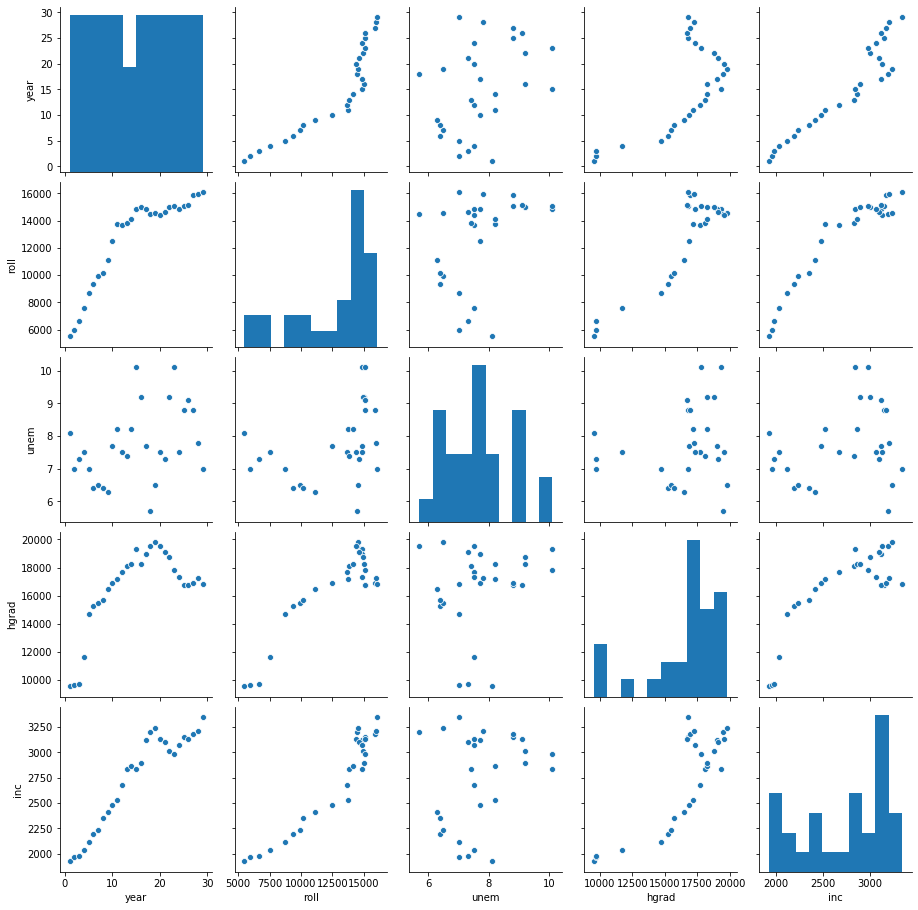

In [7]:
sb.pairplot(enroll)

In [9]:
# Determine the correlation between the predictors (the different features)
# There should be a low linear correlation between predictors (not offcourse between predictor and predictant)
# Like eg. between unemployment and hgrad below
enroll.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


In [15]:
# lets use hgrad and unem as predictors and roll as predictant
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
enroll_data = enroll[['unem','hgrad']].values
target = enroll['roll'].values
enroll_data_names = ['unem','hgrad']
x,y = scale(enroll_data),target # scale is removing the mean value of each feature, then scale it by dividing features by their standard deviation
model = LinearRegression(normalize=True)
model.fit(x,y)
print(model.score(x,y)) # score is the degree of linear correlation between data and target

0.8488812666133723
